The state of Maryland is investigating the feasibility of providing some level of assistance in 
healthcare needs of its older population. Obviously, due to budgetary constraints, they would 
be unable to cover all the needs of each and every person. So, your company has been hired by 
the state government to perform a study and identify where the state government could 
provide assistance 

# Analyze to assist in healthcare needs of its older population
## Data Cleaning

In [10]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime 


In [2]:
# Read patients demographic data into pandas dataframe
demographic=pd.read_csv('patient_data/patients.csv')
demographic.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,8/31/57,NaN,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08
1,f851859f-b0fe-8b36-9939-4276b96d302d,11/22/50,NaN,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,10/24/53,7/12/19,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81
3,8dacd569-fbab-2604-de56-9859571ba52d,1/30/64,NaN,Mr.,NaN,M,asian,hispanic,M,Lima Lima Province PE,Olney,Maryland,Montgomery County,1387577.33,3711.51
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,10/24/39,NaN,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97


In [3]:
# Check missing value
print(demographic.isna().sum())

# Check duplicates
demographic.duplicated().sum()

Id                         0
BIRTHDATE                  0
DEATHDATE              25000
PREFIX                   896
SUFFIX                 51324
MARITAL                 1369
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
CITY                       0
STATE                      0
COUNTY                     0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
dtype: int64


0

In [4]:
## Calculate age
# Change Birthdate and deathdate into m,d,y
def birth_date_parser(date):
    parsed_date = pd.to_datetime(date, format='%m/%d/%y')
    if parsed_date.year > 2000:
        parsed_date = parsed_date.replace(year=parsed_date.year -100)
    return parsed_date

def death_date_parser(date):
    parsed_date = pd.to_datetime(date, format='%m/%d/%y')
    if parsed_date.year > 2023:
        parsed_date = parsed_date.replace(year=parsed_date.year -100)
    return parsed_date

demographic['BIRTHDATE'] = demographic['BIRTHDATE'].apply(birth_date_parser)
# demographic['DEATHDATE'] = pd.to_datetime(demographic['DEATHDATE'], format='%m/%d/%y')
demographic['DEATHDATE'] = demographic['DEATHDATE'].apply(death_date_parser)
# Create AGE column 
def calculate_age(born, died=None):
    # Calculate age based on deathdate if not null
    if pd.isna(died):
        today = datetime.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    else:
        return died.year - born.year - ((died.month, died.day) < (born.month, born.day))

# Apply the function to calculate age
demographic['AGE'] = demographic.apply(lambda row: calculate_age(row['BIRTHDATE'], row['DEATHDATE']), axis=1)

demographic.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,66
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,73
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,1953-10-24,2019-07-12,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81,65
3,8dacd569-fbab-2604-de56-9859571ba52d,1964-01-30,NaT,Mr.,NaN,M,asian,hispanic,M,Lima Lima Province PE,Olney,Maryland,Montgomery County,1387577.33,3711.51,60
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,1939-10-24,NaT,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97,84


In [5]:
# Query patients only age >= 65
Old_demo=demographic[demographic['AGE']>=65]
Old_demo.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,SUFFIX,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,AGE
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,Ms.,NaN,S,white,nonhispanic,F,Germantown Maryland US,Baltimore,Maryland,Baltimore city,59484.51,1455.08,66
1,f851859f-b0fe-8b36-9939-4276b96d302d,1950-11-22,NaT,Mrs.,NaN,M,black,nonhispanic,F,Clarksburg Maryland US,Baltimore,Maryland,Baltimore city,239428.05,12764.06,73
2,00e22b7e-70ae-e926-e0f6-4f3d8e30d019,1953-10-24,2019-07-12,Mr.,NaN,S,black,nonhispanic,M,Oxon Hill Maryland US,Downsville,Maryland,Washington County,1345863.62,3951.81,65
4,fc488d45-11b9-52d3-3c81-14dbd5dbc7dc,1939-10-24,NaT,Mrs.,NaN,M,white,nonhispanic,F,Ellicott City Maryland US,Baltimore,Maryland,Baltimore city,85562.87,4717.97,84
5,bc7d25d5-4bf2-2faa-92f3-e111fb97fbcf,1928-11-09,NaT,Ms.,NaN,S,white,hispanic,F,Roseau Saint George DM,Rockville,Maryland,Montgomery County,1429312.17,16704.24,95


## Exploratory Data Analysis (EDA)
### Demographic Analysis:analyze the age distribution, gender, race, and other demographics of the older population.

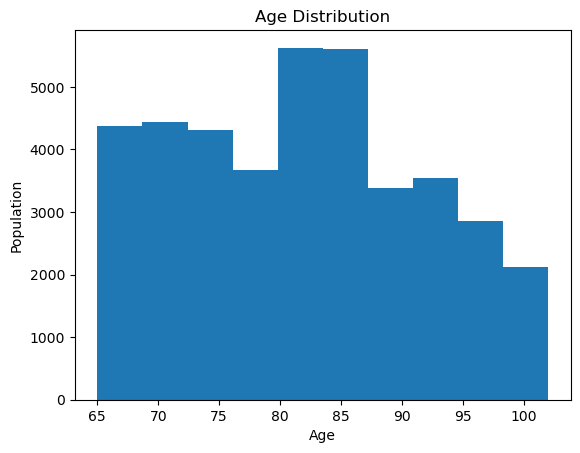

In [6]:
# Plot age histogram to show distribution
plt.hist(x='AGE',data=Old_demo, bins=10)
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Age Distribution')
plt.show()

/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/tn/1rpmlfx112j95v9ws4cxqb8c0000gn/T/ipykernel_79767/2700183692.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Old_demo['alive']=Old_demo['DEATHDATE'].isnull()
/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

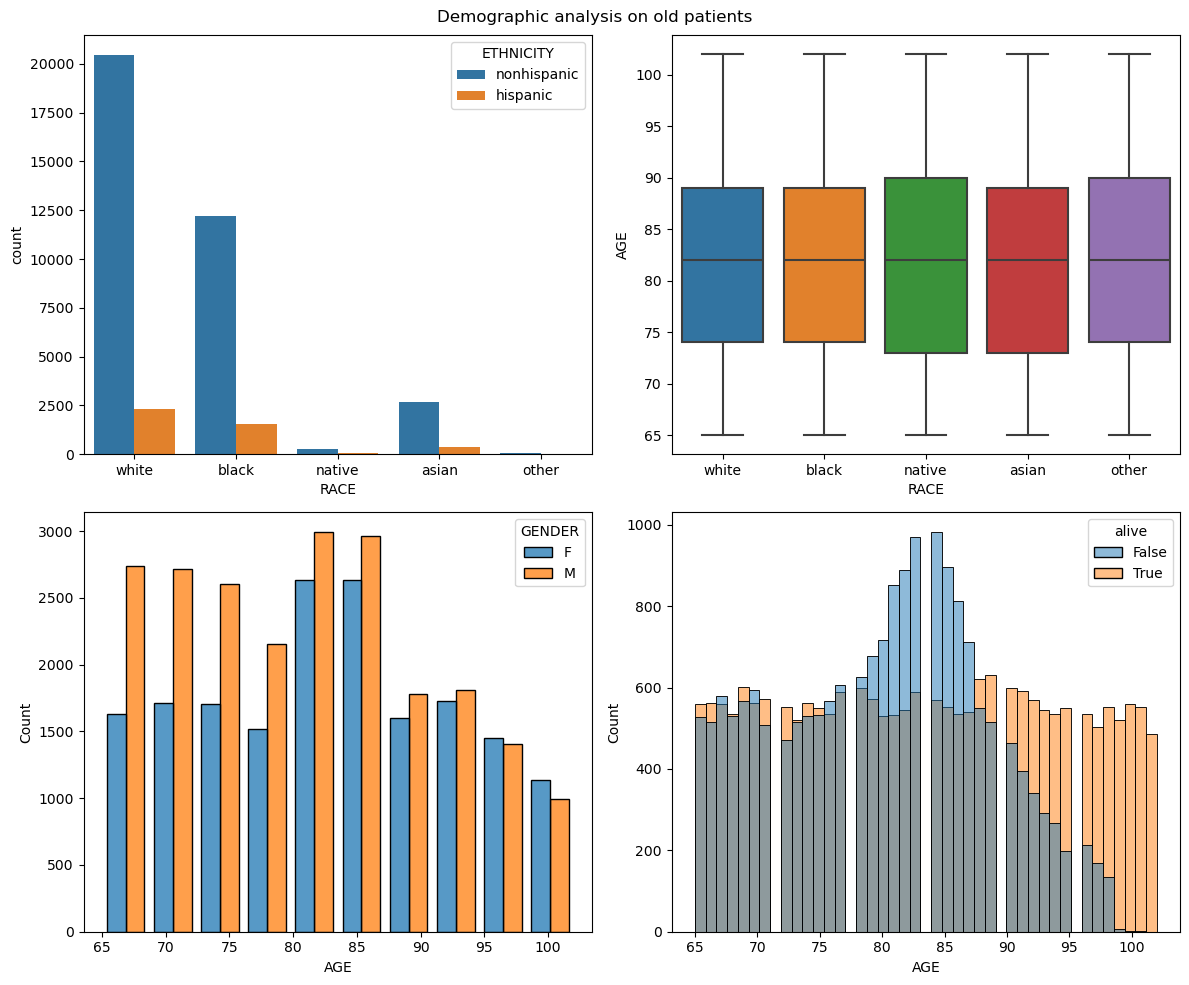

In [7]:
# Demographic analysis on old patients
fig, axs=plt.subplots(2,2, figsize=(12,10))
# Show racial and ethnic distribution
sns.countplot(x='RACE', data=Old_demo, hue='ETHNICITY', ax=axs[0,0])
# Show age distribution between races
sns.boxplot(x='RACE', y='AGE', data=Old_demo, ax=axs[0,1])
#Count age between male and female
sns.histplot( x='AGE', data=Old_demo, hue='GENDER', bins=10, multiple='dodge', shrink=.8, ax=axs[1,0])
#Show survival status across age
Old_demo['alive']=Old_demo['DEATHDATE'].isnull()
sns.histplot(x='AGE', data=Old_demo, hue='alive', ax=axs[1,1])
fig.suptitle('Demographic analysis on old patients')
plt.tight_layout()
plt.show()

/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


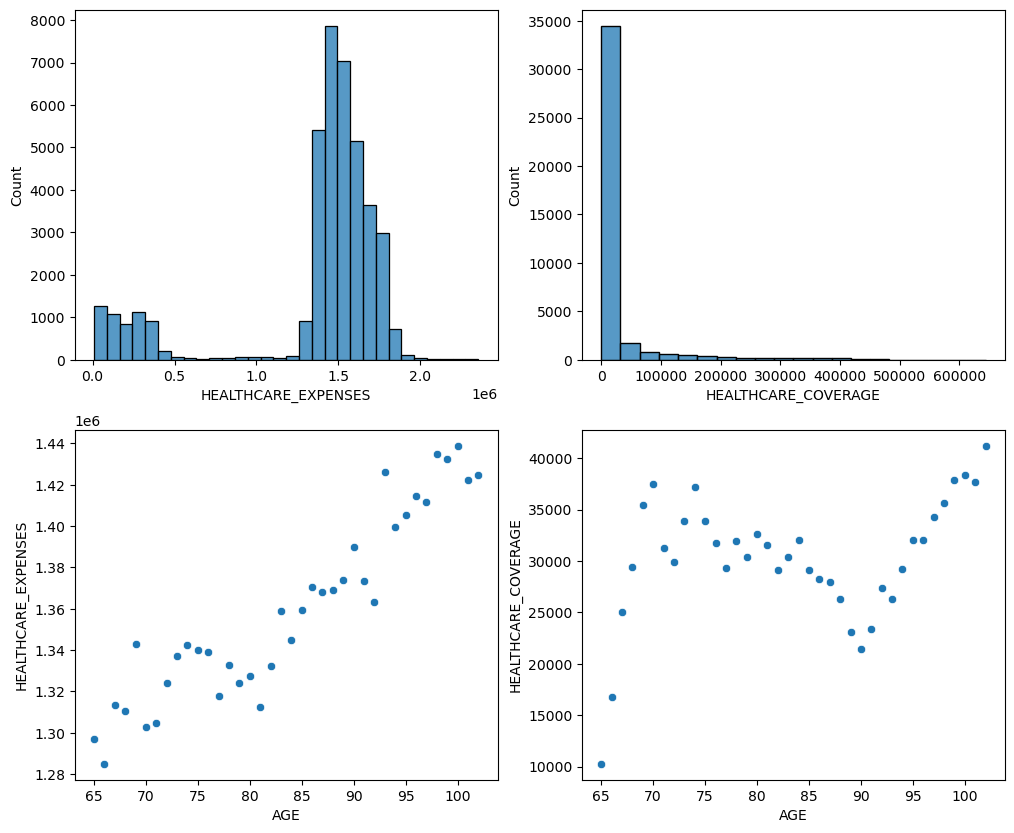

In [8]:
#Analysis on healthcare expenses and coverage
fig, axs=plt.subplots(2,2, figsize=(12,10))
#Show distribution of healthcare expenses and coverage
sns.histplot(x='HEALTHCARE_EXPENSES',data=Old_demo, bins=30 ,ax=axs[0,0])
sns.histplot(x='HEALTHCARE_COVERAGE',data=Old_demo, bins=20 ,ax=axs[0,1])
#Show relationship between age and average healthcare expenses
average_expenses = Old_demo.groupby('AGE')['HEALTHCARE_EXPENSES'].mean().reset_index()
sns.scatterplot(x='AGE', y='HEALTHCARE_EXPENSES', data=average_expenses,ax=axs[1,0])
#Show relationship between age and average healthcare covergae
average_coverage = Old_demo.groupby('AGE')['HEALTHCARE_COVERAGE'].mean().reset_index()
sns.scatterplot(x='AGE', y='HEALTHCARE_COVERAGE', data=average_coverage,ax=axs[1,1])
plt.show()


## In_depth Analysis
### Condition analysis 
### Encounter analysis 1. with different encounter types 2. Among uninsured patients

In [9]:
import networkx as nx
condition=pd.read_csv('patient_data/conditions.csv')
concept_labels_file = 'inputs/snomed_20220301_labels.txt'
concept_hierarchy_file = 'inputs/snomed_20220301_hierarchy.txt'
graph = nx.DiGraph()

# load SNOMED CT concepts to NetworkX graph
with open(concept_labels_file, 'r') as labels_file:
    for line in labels_file.readlines():
        concept_ID, concept_label = line.rstrip("\n").split("\t")
        graph.add_node(concept_ID, label=concept_label)
        
# load SNOMED CT hierarchical relations to NetworkX graph
with open(concept_hierarchy_file, 'r') as hierarchy_file:
    for line in hierarchy_file.readlines():
        child, parent = line.rstrip("\n").split("\t")
        graph.add_edge(parent, child)

# Get subclasses with given code 
def get_subclasses(concept_id):
    if concept_id not in graph.nodes():
        return
    return nx.descendants(graph, concept_id)

# Find immediate parent of given code
def find_parent_concept(concept_id):
    if concept_id not in graph.nodes:
        return None, "Node not in graph"
    try:
        parent = next(graph.predecessors(concept_id))
        return parent, graph.nodes[parent]['label']
    except StopIteration:
        return None, "No parent found"
# Catogorize code into concept id
def classify_code(df):
    code = str(df['CODE'])  
    subclasses = get_subclasses(code)
    if subclasses:
        # If subclasses exist, it's a concept ID
        return graph.nodes[code]['label'] if code in graph.nodes else "Label not found"
    else:
        # If no subclasses, it's a subclass, find its parent concept
        parent_id, parent_label = find_parent_concept(code)
        if parent_id:
            return parent_label
        else:
            return df['DESCRIPTION']
condition['concept_label'] = condition.apply(classify_code, axis=1)
condition.head(10)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,concept_label
0,1973-12-22,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,47a338d3-4e76-fdfd-564c-7c68e1d815f7,19169002,Miscarriage in first trimester,Miscarriage (disorder)
1,1992-12-02,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,ed3e50dd-ebdf-eaee-a261-f6603ac25e05,162864005,Body mass index 30+ - obesity (finding),Obese (finding)
2,1996-12-11,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,e56964f0-e8a2-816e-e974-a05722171550,44054006,Diabetes,Diabetes mellitus type 2 (disorder)
3,1996-12-11,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,e56964f0-e8a2-816e-e974-a05722171550,59621000,Hypertension,Essential hypertension (disorder)
4,1994-11-19,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,940f5276-8893-2ee3-d204-1fe285291d5d,162864005,Body mass index 30+ - obesity (finding),Obese (finding)
5,1997-09-06,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,f7af3f29-3282-5e61-c51d-fa6661cab362,15777000,Prediabetes,Prediabetes
6,1997-12-17,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,a1fc1e7f-098d-1538-053f-97fc41eebea0,80394007,Hyperglycemia (disorder),Hyperglycemia (disorder)
7,1997-12-17,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,a1fc1e7f-098d-1538-053f-97fc41eebea0,302870006,Hypertriglyceridemia (disorder),Hypertriglyceridemia (disorder)
8,1997-12-17,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,a1fc1e7f-098d-1538-053f-97fc41eebea0,237602007,Metabolic syndrome X (disorder),Metabolic disease (disorder)
9,1997-12-17,NaN,f851859f-b0fe-8b36-9939-4276b96d302d,a1fc1e7f-098d-1538-053f-97fc41eebea0,15777000,Prediabetes,Prediabetes


In [34]:
#Count the 10 most concept labels
value_counts = condition['concept_label'].value_counts().nlargest(10)
value_counts

concept_label
Viral sinusitis (disorder)                                                      59538
Acute viral pharyngitis (disorder)                                              32738
Obese (finding)                                                                 31312
Prediabetes                                                                     27790
Acute bronchitis (disorder)                                                     26927
Suspected coronavirus infection (situation)                                     26298
Anemia (disorder)                                                               25949
Disease caused by severe acute respiratory syndrome coronavirus 2 (disorder)    25761
Fever (finding)                                                                 23548
Chronic sinusitis (disorder)                                                    18237
Name: count, dtype: int64

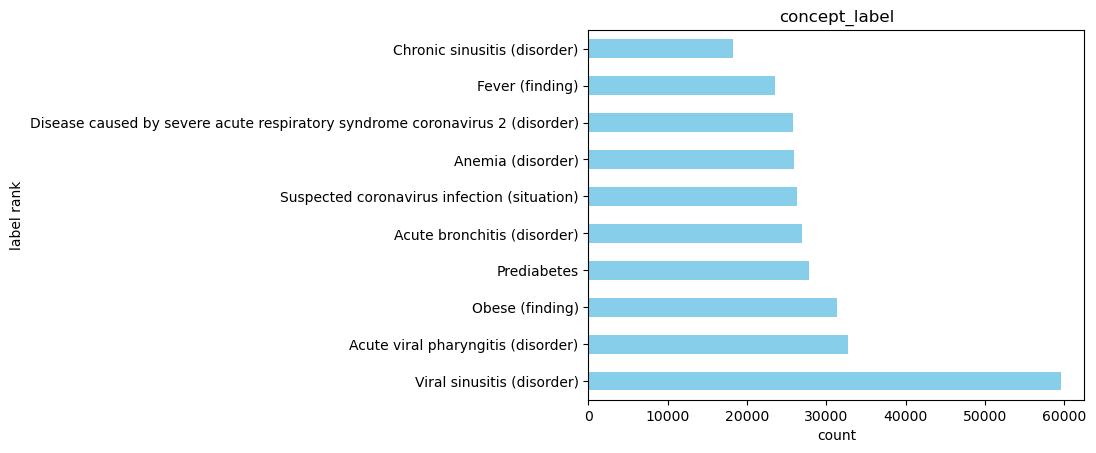

In [11]:
# Plot 10 most counted concept label
value_counts.plot(kind='barh', color='skyblue')
plt.title('concept_label')
plt.xlabel('count')
plt.ylabel('label rank')
plt.xticks(rotation=0)
plt.show()

In [33]:
# Merge df patient and condition
patients=Old_demo[['Id','BIRTHDATE','DEATHDATE', 'AGE', 'GENDER', 'RACE', 'ETHNICITY', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']]
patient_condition=pd.merge(patients,condition, left_on='Id',right_on='PATIENT', how='left')
patient_condition.head()


,Id,BIRTHDATE,DEATHDATE,AGE,GENDER,RACE,ETHNICITY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,concept_label
0,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,66,F,white,nonhispanic,59484.51,1455.08,1973-12-22,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,47a338d3-4e76-fdfd-564c-7c68e1d815f7,19169002.0,Miscarriage in first trimester,Miscarriage (disorder)
1,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,66,F,white,nonhispanic,59484.51,1455.08,1994-11-19,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,940f5276-8893-2ee3-d204-1fe285291d5d,162864005.0,Body mass index 30+ - obesity (finding),Obese (finding)
2,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,66,F,white,nonhispanic,59484.51,1455.08,1997-09-06,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,f7af3f29-3282-5e61-c51d-fa6661cab362,15777000.0,Prediabetes,Prediabetes
3,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,66,F,white,nonhispanic,59484.51,1455.08,1997-09-06,NaN,f1639046-ecb1-b409-21d3-85a7e8e23c81,f7af3f29-3282-5e61-c51d-fa6661cab362,271737000.0,Anemia (disorder),Anemia (disorder)
4,f1639046-ecb1-b409-21d3-85a7e8e23c81,1957-08-31,NaT,66,F,white,nonhispanic,59484.51,1455.08,2013-03-17,2013-04-01,f1639046-ecb1-b409-21d3-85a7e8e23c81,b1b85656-d93b-af75-8b62-4b55b47e84ad,444814009.0,Viral sinusitis (disorder),Viral sinusitis (disorder)


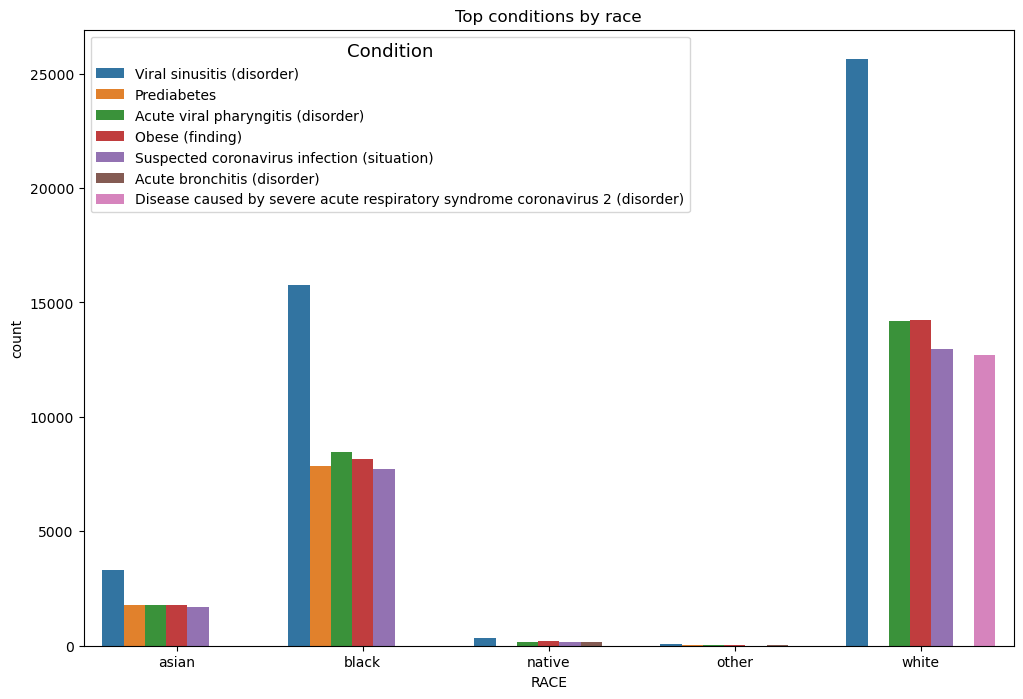

In [13]:
#Analyze which conditions are most common among different races
#Group Race and condition by race
condition_counts = patient_condition.groupby(['RACE','concept_label']).size().reset_index(name='count')
#Sort data by race and count to find most common conditions
sorted_conditions = condition_counts.sort_values(by=['RACE', 'count'], ascending=[True, False])
# Get top 5 conditions for each race
conditions_per_race = sorted_conditions.groupby('RACE').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(x='RACE',y='count', data=conditions_per_race, hue='concept_label')
plt.title('Top conditions by race')
plt.legend(title='Condition', title_fontsize='13', fontsize='10')
plt.show()

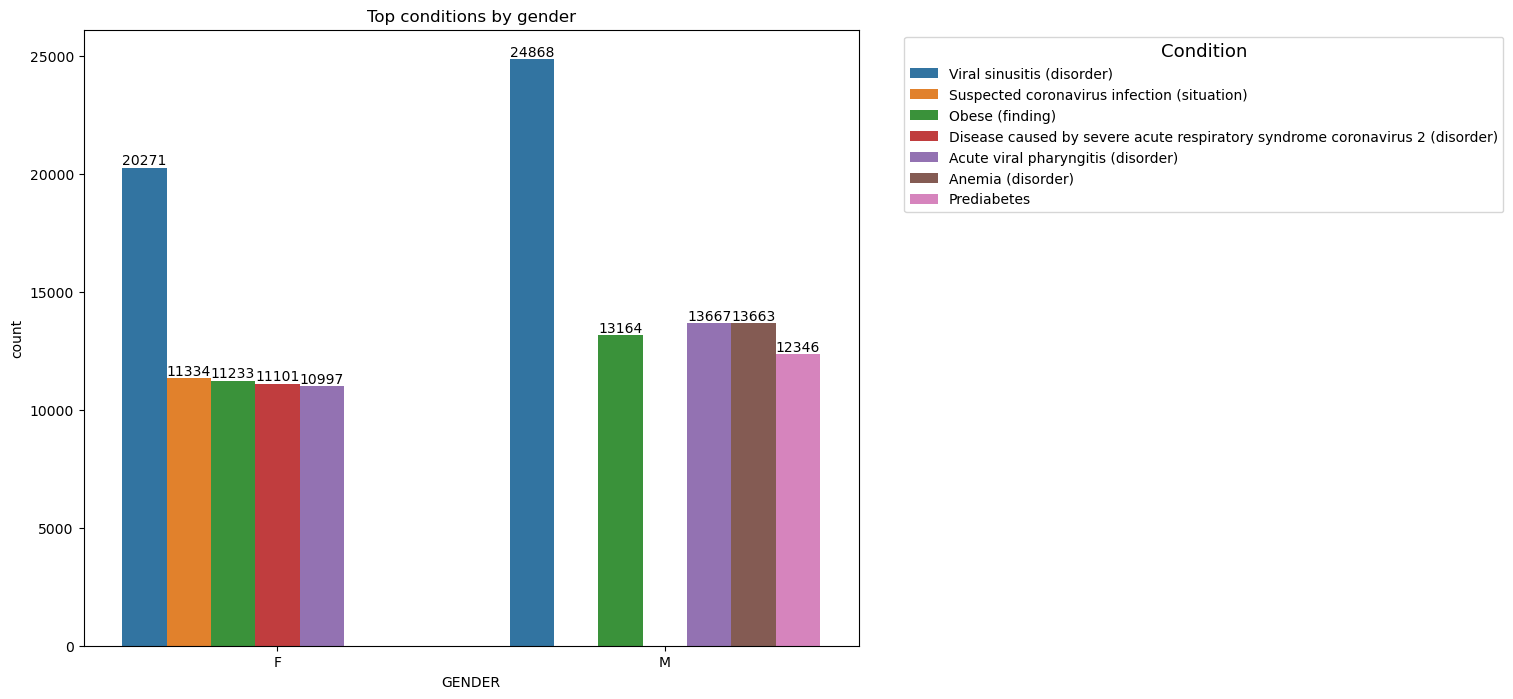

In [14]:
#Analyze which conditions are most common among different gender
#Group gender and condition by gender
gender_counts = patient_condition.groupby(['GENDER','concept_label']).size().reset_index(name='count')
#Sort data by gender and count to find most common conditions
sorted_gender = gender_counts.sort_values(by=['GENDER', 'count'], ascending=[True, False])
# Get top 5 conditions for each gender
conditions_per_gender = sorted_gender.groupby('GENDER').head(5)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='GENDER',y='count', data=conditions_per_gender, hue='concept_label')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top conditions by gender')
plt.legend(title='Condition', title_fontsize='13', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

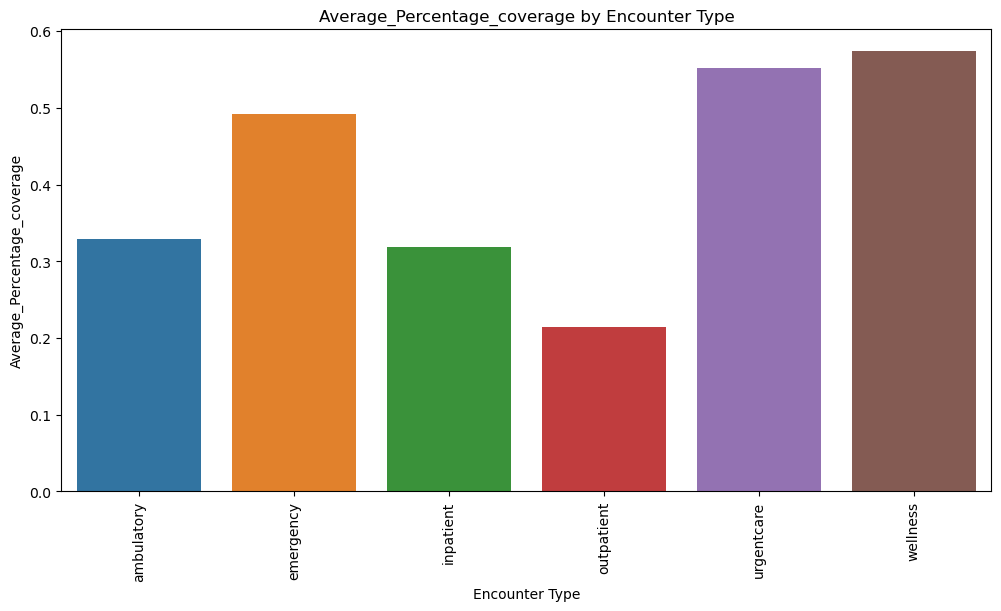

In [15]:
#Compare average percentage coverage among encounter types
encounter=pd.read_csv('patient_data/encounters.csv')

#Caluculate differeces and percentage coverage
encounter['Cost_Difference'] = encounter['TOTAL_CLAIM_COST'] - encounter['PAYER_COVERAGE']
encounter['Percentage_coverage'] = (encounter['PAYER_COVERAGE'] / encounter['TOTAL_CLAIM_COST'])
#Calculate average percentage coverage by encounter types
costs_by_type = encounter.groupby('ENCOUNTERCLASS').agg(
    Average_Base_Cost=pd.NamedAgg(column='BASE_ENCOUNTER_COST', aggfunc='mean'),
    Average_Total_Cost=pd.NamedAgg(column='TOTAL_CLAIM_COST', aggfunc='mean'),
    Average_Percentage_coverage=pd.NamedAgg(column='Percentage_coverage', aggfunc='mean')
).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='ENCOUNTERCLASS', y='Average_Percentage_coverage', data=costs_by_type)
plt.title('Average_Percentage_coverage by Encounter Type')
plt.xlabel('Encounter Type')
plt.ylabel('Average_Percentage_coverage')
plt.xticks(rotation=90)
plt.show()




/var/folders/tn/1rpmlfx112j95v9ws4cxqb8c0000gn/T/ipykernel_67732/731651948.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  encounter['YearMonth'] = encounter['START'].dt.to_period('M').dt.start_time


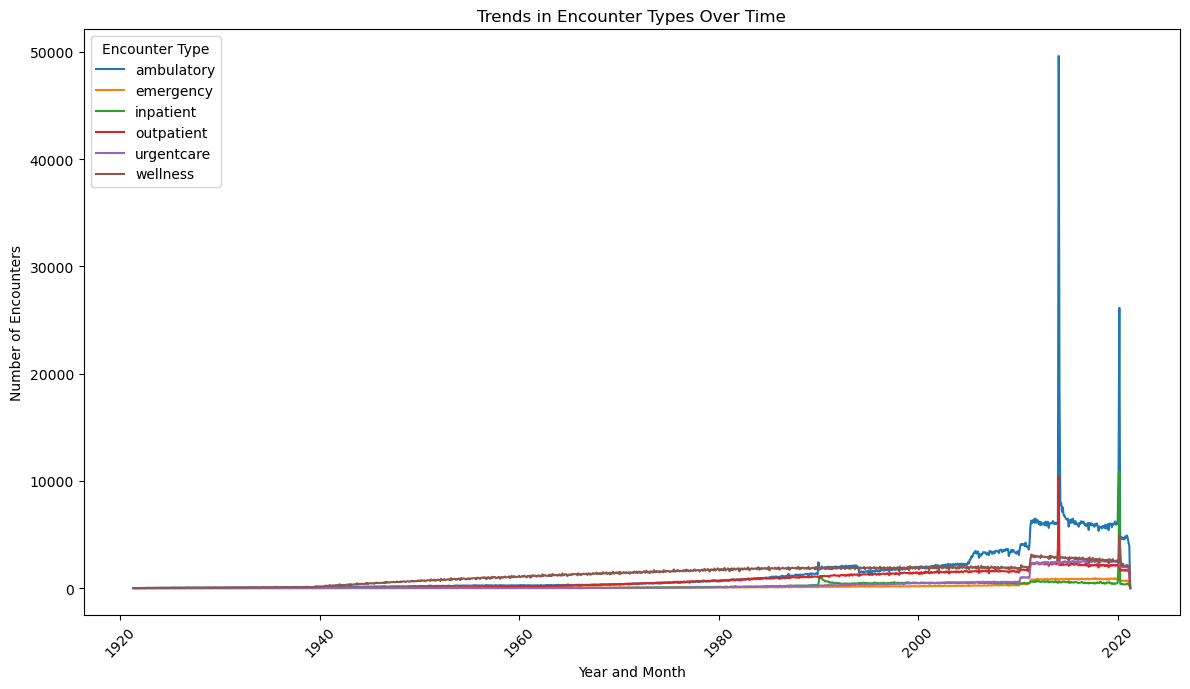

In [16]:
#To identify which types of encounters are most common and how this trend changes over time
encounter['START'] = pd.to_datetime(encounter['START'])

# Extract year and month for time-based grouping
encounter['Year'] = encounter['START'].dt.year4
encounter['Month'] = encounter['START'].dt.month
encounter['YearMonth'] = encounter['START'].dt.to_period('M').dt.start_time
encounter_counts = encounter.groupby(['YearMonth', 'ENCOUNTERCLASS']).size().reset_index(name='Counts')

# Pivot data for better visualization
encounter_pivot = encounter_counts.pivot(index='YearMonth', columns='ENCOUNTERCLASS', values='Counts').fillna(0)
plt.figure(figsize=(12, 7))
for column in encounter_pivot.columns:
    plt.plot(encounter_pivot.index, encounter_pivot[column], label=column)

plt.title('Trends in Encounter Types Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Encounters')
plt.legend(title='Encounter Type')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()



/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


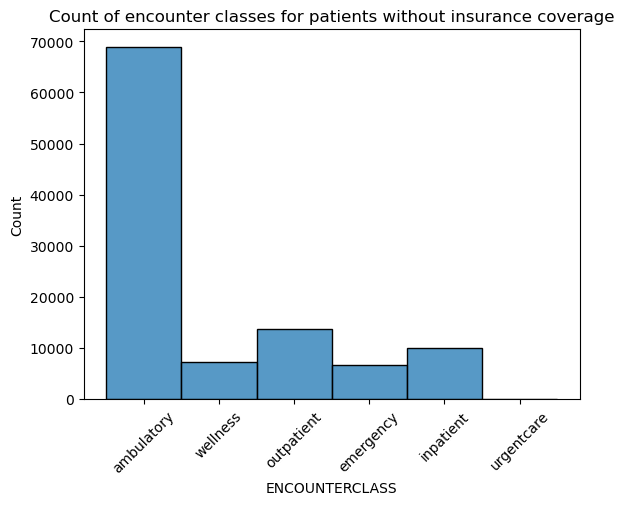

In [26]:
# Merge encounter with patient_condition
patient_condition_encounter=pd.merge(patient_condition,encounter, left_on='ENCOUNTER',right_on='Id', how='left')

#Compare the encouter class of patients with no insurrance coverage
sns.histplot(x='ENCOUNTERCLASS', data=patient_condition_encounter[patient_condition_encounter['PAYER_COVERAGE'] == 0])
plt.xticks(rotation=45)
plt.title('Count of encounter classes for patients without insurance coverage')
plt.show()


/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


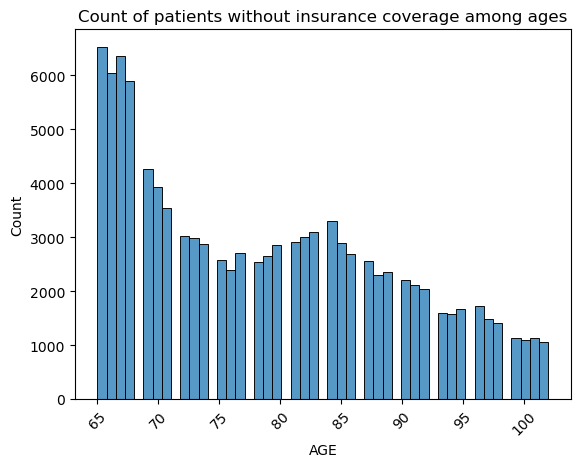

In [27]:
#Compare count of people who do not have issurance across different ages
sns.histplot(x='AGE', data=patient_condition_encounter[patient_condition_encounter['PAYER_COVERAGE'] == 0])
plt.xticks(rotation=45)
plt.title('Count of patients without insurance coverage among ages')
plt.show()


/Users/ziyingwang/opt/anaconda3/envs/bmi6318/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


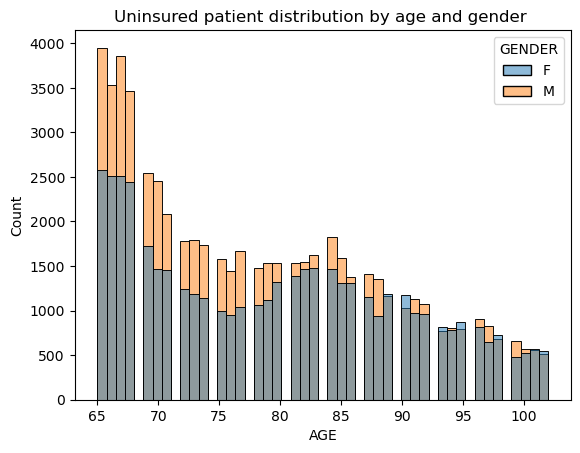

In [32]:
# Compare count of female and male patients across ages without insurrance
sns.histplot(x='AGE', data=patient_condition_encounter[patient_condition_encounter['PAYER_COVERAGE'] == 0], hue='GENDER')
plt.title('Uninsured patient distribution by age and gender ')
plt.show()
